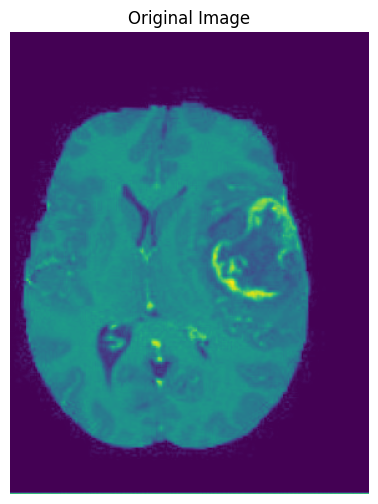

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('img8.jpg', cv2.IMREAD_GRAYSCALE)
# image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# Show the original image
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()


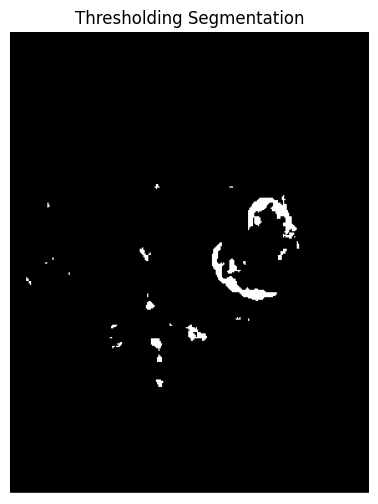

In [2]:
# thresholding means converting pixel values to binary
# i.e if pixel value is greater than 127 it will covert it to 255(white)
# if less than 127 it will converted to 0 (black)
# Apply Global Thresholding
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Show result
plt.figure(figsize=(6,6))
plt.imshow(thresh, cmap='gray')
plt.title("Thresholding Segmentation")
plt.axis('off')
plt.show()


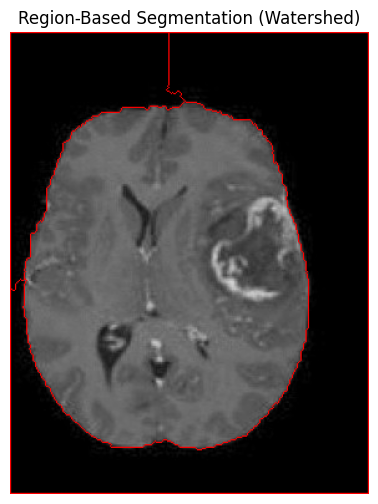

In [3]:
# Convert image to color (needed for markers)
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Apply Otsu’s thresholding to remove noise
_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find sure background
kernel = np.ones((3,3), np.uint8)
sure_bg = cv2.dilate(binary, kernel, iterations=3)

# Find sure foreground
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Find unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed algorithm
cv2.watershed(image_color, markers)
image_color[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# Show the segmented result
plt.figure(figsize=(6,6))
plt.imshow(image_color)
plt.title("Region-Based Segmentation (Watershed)")
plt.axis('off')
plt.show()


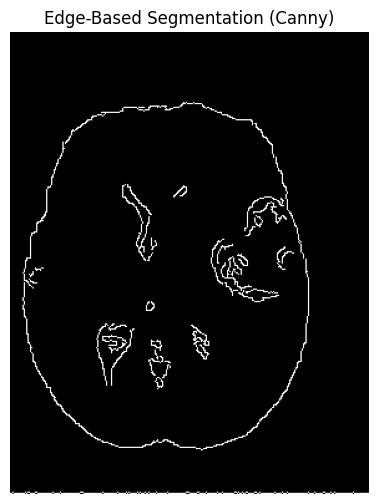

In [4]:
# Apply Canny Edge Detection
edges = cv2.Canny(image, 100, 200)

# Show result
plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.title("Edge-Based Segmentation (Canny)")
plt.axis('off')
plt.show()
